# Interpolacion de los numeros adimensionales
# Autores: Juan Andres Mendez G.,
# IMEC 3431: Procesos de manufactura industrial


> Carga de datos

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
# Use matplotlib's style settings
plt.style.use('dark_background')
# Load the data
path='./data/example_data/'
def import_data(file_name):
    labels=pd.read_excel(file_name,sheet_name='Machine materials')
    lb=labels.to_numpy()
    d={}
    for i in range(len(lb)):
        d[i]=pd.read_excel(file_name,sheet_name=str(lb[i,0]))
    return d,lb
cost_table=pd.read_excel(path+'tooling_data.xlsx',sheet_name='Costs')
time_volume_table=pd.read_excel(path+'tooling_data.xlsx',sheet_name='Time and volume')
df,lb=import_data(path+'tooling_data.xlsx')

Visualizacion de las tablas

In [134]:
time_volume_table

Tabla de tiempos y volumen (s, mm^3)        Valor
0  Tp: Tiempo de preparación de la máquina [s]    1800.0000
1    Tt:Tiempo de cambio de la herramienta [s]     900.0000
2            Ti: Tiempo de improductividad [s]    5000.0000
3                Volumen de la materia  [mm^3]  506707.4791

In [135]:
cost_table

Tabla de costos (En pesos)  Costo [COP]
0  Cp: Costos de preparación de la máquina          800
1            Cf: Costo del fluido de corte         1000
2    Com: Costo de operación de la máquina         1350
3             Ci: Costo de improductividad          900
4                  Insumos (Materia prima)         7000
5   Ss: Remuneración de sueldos y salarios       716000
6              CH: Costo de la herramienta         5800
7                                       C1         4050

In [136]:
for i in range(len(lb)):
    print(lb[i,0])
    print(df[i].head(1))
    print('\n')


steel_1020_carbide
   Unnamed: 0  #  Diametro (mm)  Pc Profundidad (mm)  Lm Longitud (mm)  \
0           1  1           24.5                    2                50   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
0                            97.6                      321.5   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
0                           419.1                    12.51   

   Av velocidad de avance (mm/s)  Afiladas #  Desgaste  Valor de venta $  \
0                         0.1555           1      86.2             10000   

   Valor producción $  
0                7116  


steel_1040_carbide
   Unnamed: 0  #  Diámetro (mm)  Pc Profundidad (mm)  Lm Longitud (mm)  \
0           1  1           24.5                    2                50   

   Tiempo de carga y descarga (s)  T Tiempo de Operación (s)  \
0                           125.9                      265.2   

   Tiempo total de mecanizado (s)  Velocidad angular [1/S]  \
0               

> Calculo de los indicadores adimencionales

In [137]:
# Parameters
C_p=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Cp: Costos de preparación de la máquina']
C_p=cost_table.loc[C_p,'Costo [COP]']
C_p=float(C_p)
C_f=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Cf: Costo del fluido de corte']
C_f=cost_table.loc[C_f,'Costo [COP]']
C_f=float(C_f)
C_om=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Com: Costo de operación de la máquina']
C_om=cost_table.loc[C_om,'Costo [COP]']
C_om=float(C_om)
C_i=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Ci: Costo de improductividad']
C_i=cost_table.loc[C_i,'Costo [COP]']
C_i=float(C_i)
store=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Insumos (Materia prima)']
store=cost_table.loc[store,'Costo [COP]']
store=float(store)
S_s=cost_table.index[cost_table['Tabla de costos (En pesos)']=='Ss: Remuneración de sueldos y salarios']
S_s=cost_table.loc[S_s,'Costo [COP]']
S_s=float(S_s)
C_H=cost_table.index[cost_table['Tabla de costos (En pesos)']=='CH: Costo de la herramienta']
C_H=cost_table.loc[C_H,'Costo [COP]']
C_H=float(C_H)
C1=C_p+C_f+C_om+C_i
V_MP=time_volume_table.index[time_volume_table['Tabla de tiempos y volumen (s, mm^3)']=='Volumen de la materia  [mm^3]']
V_MP=time_volume_table.loc[V_MP,'Valor']
V_MP=float(V_MP)
#Print the cost of the machining process in COP
print('El costo de preparación de la maquina es:'+"${:,.2f}".format(C_p))
print('El costo del fluido de corte es:'+"${:,.2f}".format(C_f))
print('El costo de operación de la maquina es:'+"${:,.2f}".format(C_om))
print('El costo de improductividad es:'+"${:,.2f}".format(C_i))
print('El costo total de la maquina es:'+"${:,.2f}".format(C1))
print('El costo de los insumos es:'+"${:,.2f}".format(store))
print('El costo de los salarios es:'+"${:,.2f}".format(S_s))
print('El costo de la herramienta es:'+"${:,.2f}".format(C_H))
print('El volumen de la materia prima es: ',V_MP,'[mm^3]')

El costo de preparación de la maquina es:$800.00
El costo del fluido de corte es:$1,000.00
El costo de operación de la maquina es:$1,350.00
El costo de improductividad es:$900.00
El costo total de la maquina es:$4,050.00
El costo de los insumos es:$7,000.00
El costo de los salarios es:$716,000.00
El costo de la herramienta es:$5,800.00
El volumen de la materia prima es:  506707.4791 [mm^3]


In [138]:
for i in range(len(lb)):
    df[i]['V_mr (mm^3)']=df[i]['Lm Longitud (mm)']*df[i]['Av velocidad de avance (mm/s)']*df[i]['T Tiempo de Operación (s)']*df[i]['Pc Profundidad (mm)']
    df[i]['Pi_1']=(C1/df[i]['V_mr (mm^3)'])/(store/V_MP)
    df[i]['CHF $']=(C_H*
    df[i]['T Tiempo de Operación (s)'])/(df[i]['Afiladas #']*df[i]['Tiempo total de mecanizado (s)'])
    df[i]['Pi_2']=(C1/(df[i]['Desgaste']*10**-3))/(df[i]['CHF $']/df[i]['Lm Longitud (mm)'])
    df[i]['Pi_3']=df[i]['Valor de venta $']/df[i]['Valor producción $']


Grafica de los indicadores adimensionales dividos por grupos

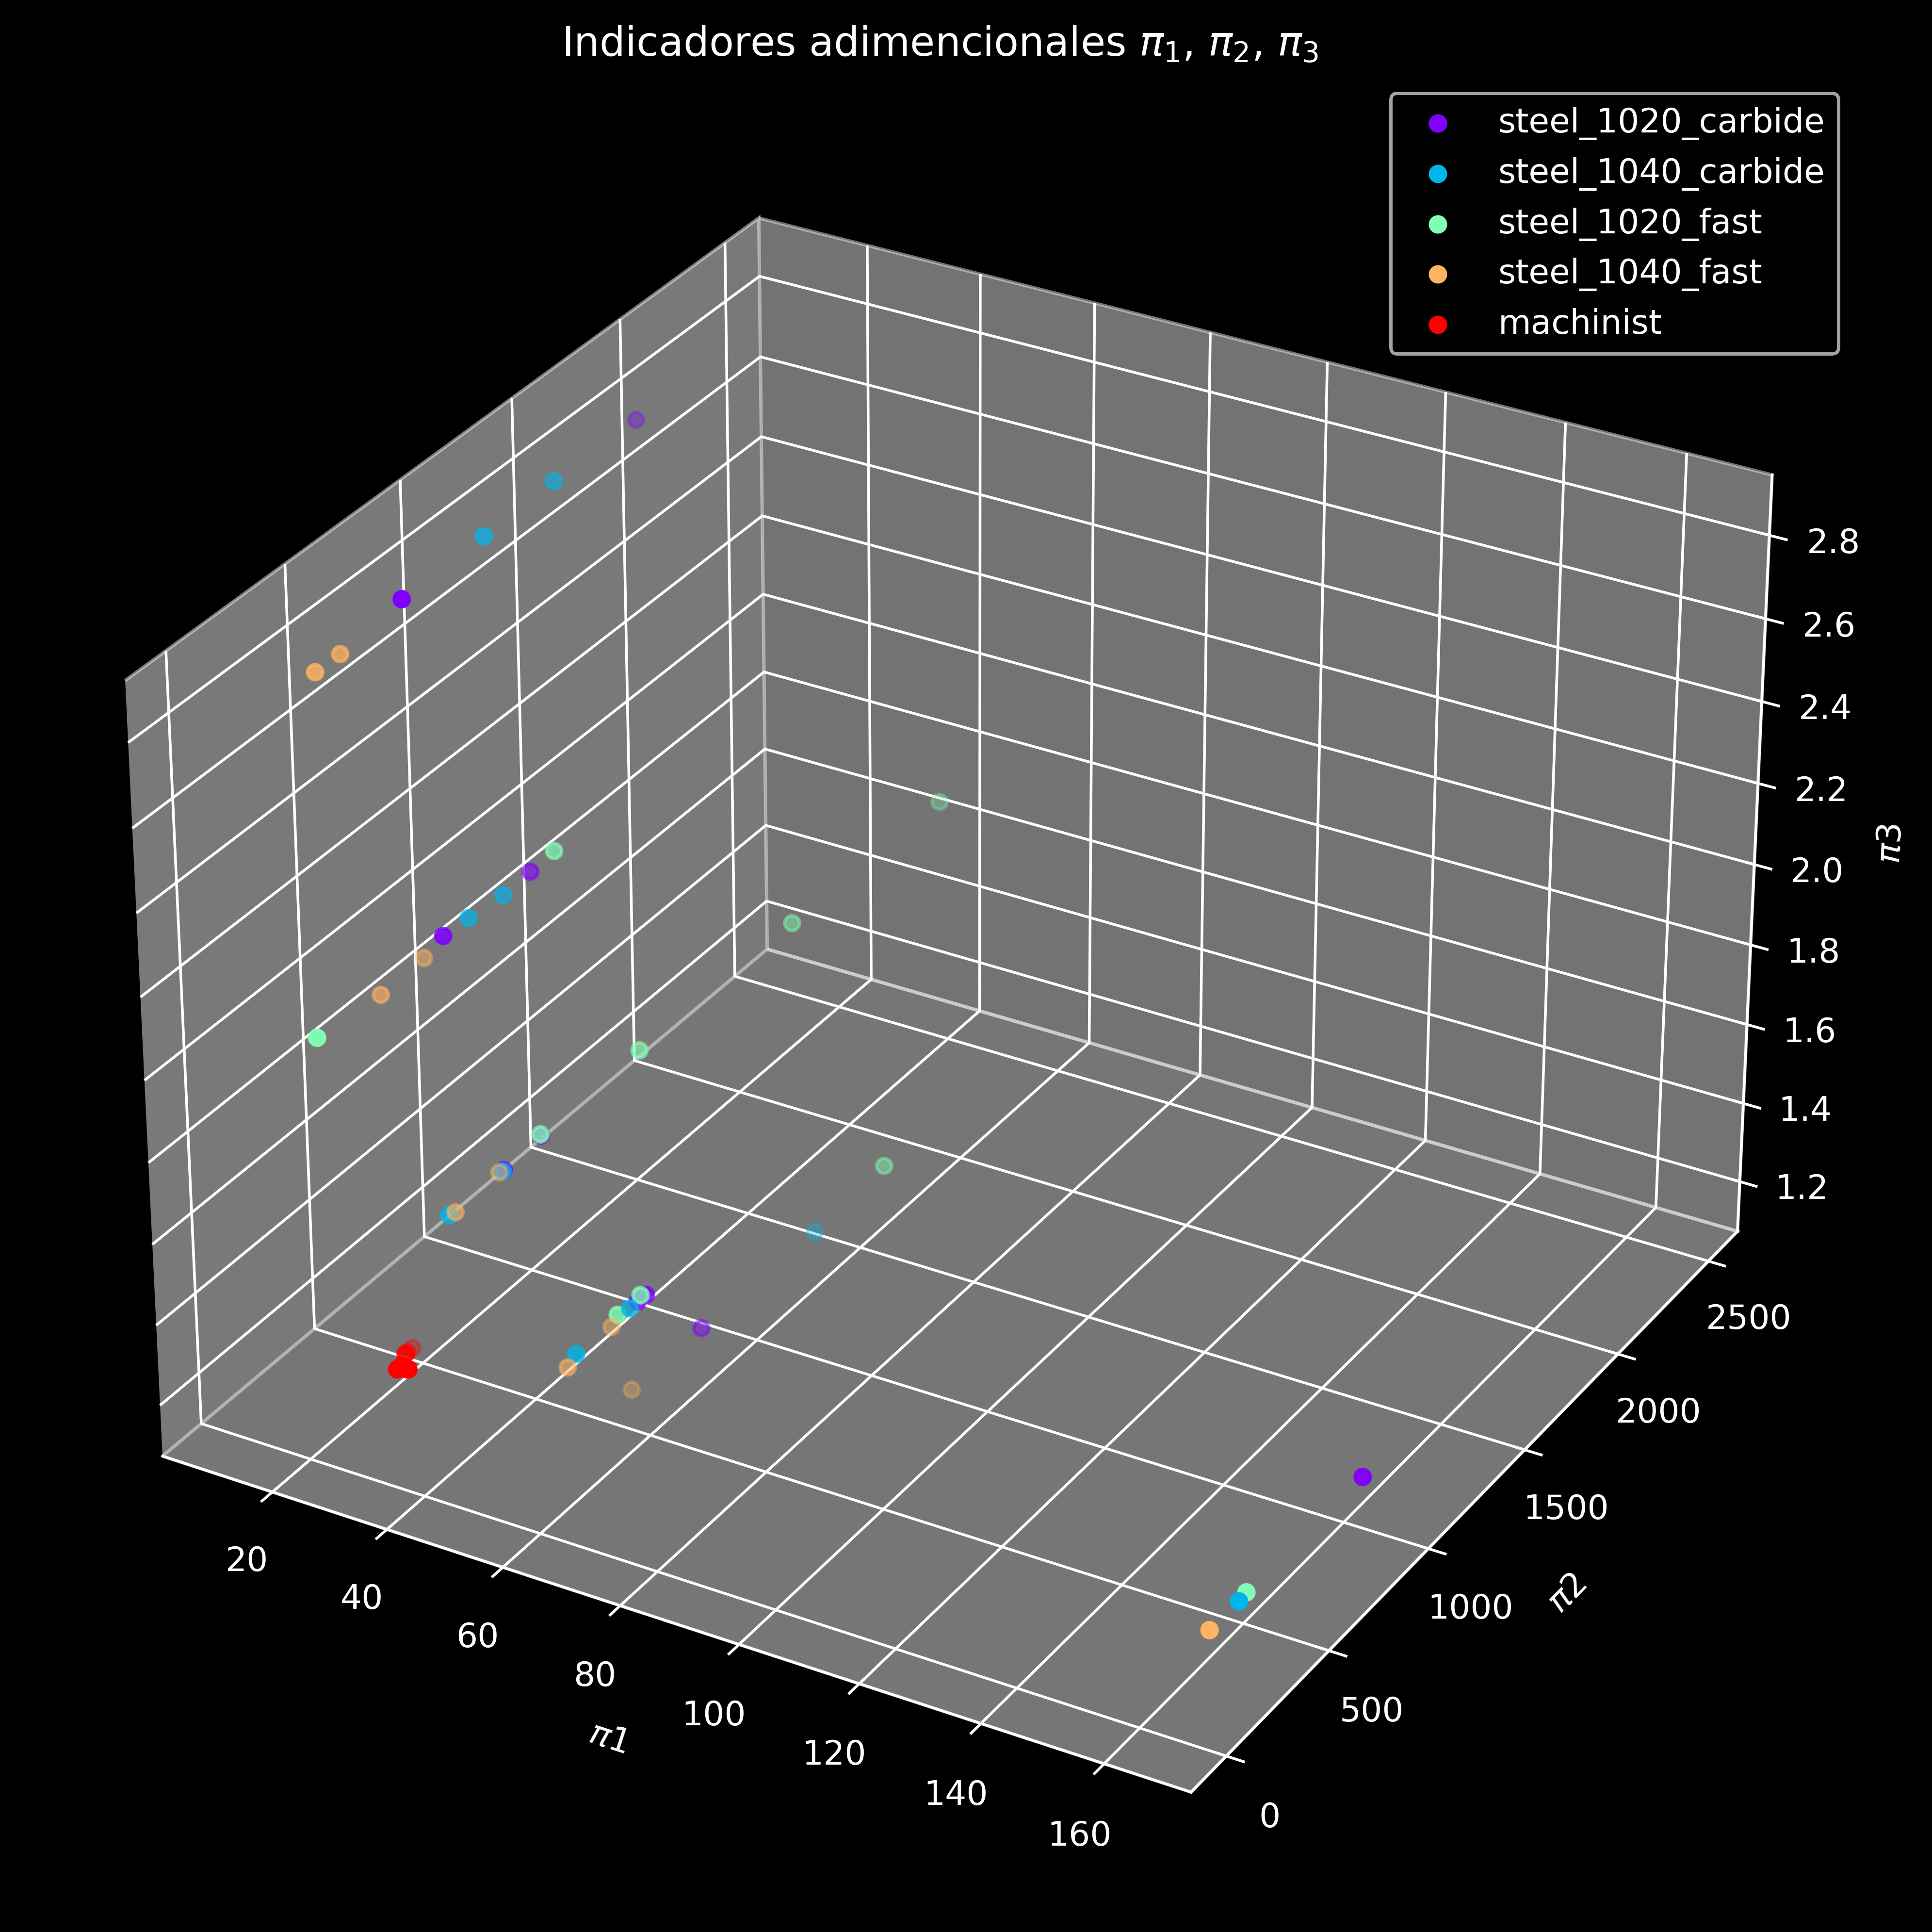

In [139]:
def graph_data(data ,label,ax,c):
    ax.scatter(data['Pi_1'],data['Pi_2'],data['Pi_3'],cmap='jet',label=label,color=c)
fig = plt.figure(figsize=(10,10),dpi=500)
ax = fig.add_subplot(111, projection='3d')
color = iter(cm.rainbow(np.linspace(0, 1, len(lb))))
for i, c in zip(range(len(lb)), color):
    graph_data(df[i],lb[i,0],ax,c)
ax.set_xlabel(r'$\pi 1$')
ax.set_ylabel(r'$\pi 2$')
ax.set_zlabel(r'$\pi 3$')
ax.title.set_text(r'Indicadores adimencionales $\pi_1$, $\pi_2$, $\pi_3$')
plt.legend()
plt.show()

Regreción 3D para hallar la superfice de mayor ajuste a los datos de la forma:
$$z(x,y)=ax^by^c+dx^{\left (c+1\right)}y^{\left (b+1\right)}$$

In [140]:
pi_1=np.array([])
pi_2=np.array([])
pi_3=np.array([])
for i in range(len(lb)):
    pi_1=np.append(pi_1,np.array(df[i]['Pi_1']).reshape(10,1))
    pi_2=np.append(pi_2,np.array(df[i]['Pi_2']).reshape(10,1))
    pi_3=np.append(pi_3,np.array(df[i]['Pi_3']).reshape(10,1))

points=np.array([pi_1,pi_2])
# makea a 3d interpolation
grid_x, grid_y = np.mgrid[np.min(pi_1)-0.01*pi_1.std():np.max(pi_1)+0.01*pi_1.std():1000j, np.min(pi_2)-0.01*pi_2.std():np.max(pi_2)+0.01*pi_1.std():1000j]

def curve(data,a,b,c,d):
    x=data[0]
    y=data[1]
    return a*x**b*y**c+d*x**(b+1)*y**(c+1)

parameters,cov=curve_fit(curve,points,pi_3,maxfev=100000000)
z=curve([grid_x,grid_y],*parameters)

perr=np.sqrt(abs(np.diag(cov)))
parameters_labels=['a','b','c','d']
parameters_df=pd.DataFrame(index=parameters_labels)
parameters_df['Valor']=parameters
parameters_df['Error[dev std]']=perr
# Set index titles
parameters_df.index.name='Parametros'
parameters_df.head()

Valor  Error[dev std]
Parametros                          
a           5.646650        2.329766
b          -0.442820        0.063339
c           0.046888        0.044964
d           0.000010        0.000016

> Concatenacion de los datos y creación de maya

Grafica de la superfice de mayor ajuste

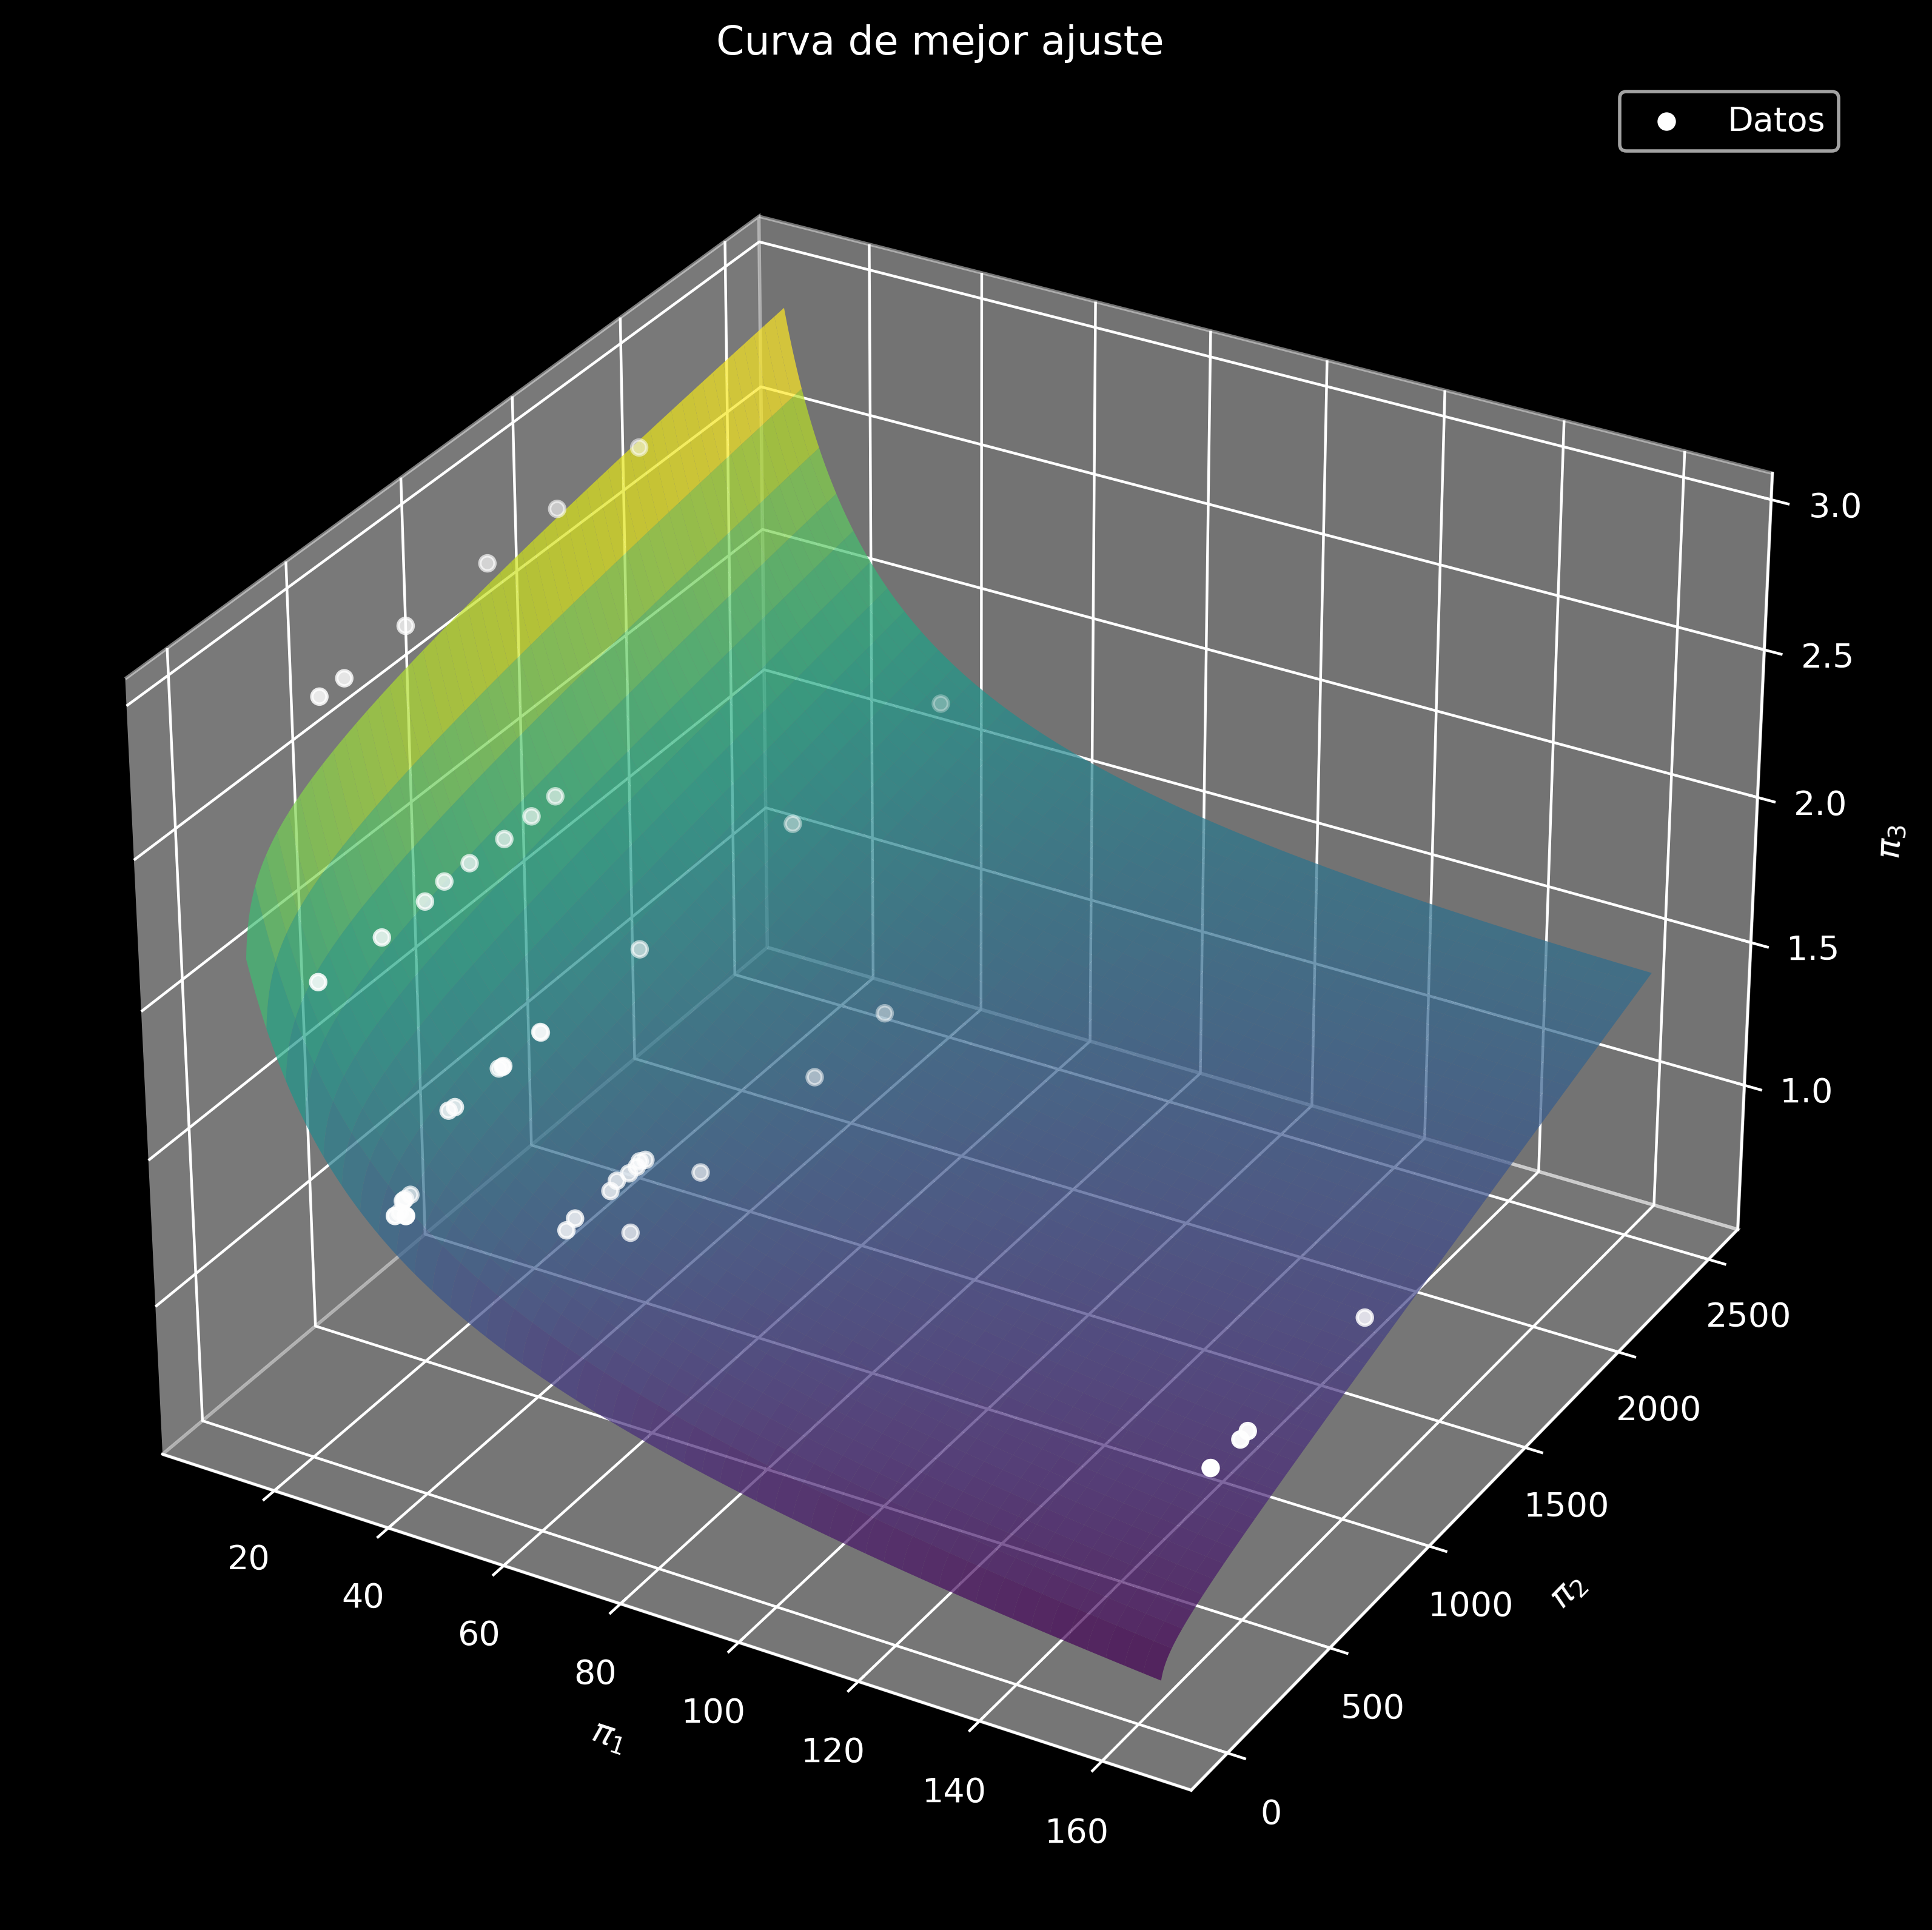

In [141]:
fig=plt.figure(figsize=(10,10),dpi=400)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(grid_x,grid_y,z,alpha=0.7,cmap='viridis')
ax.scatter(pi_1,pi_2,pi_3,color='white',label='Datos')
ax.set_xlabel(r'$\pi_1$')
ax.set_ylabel(r'$\pi_2$')
ax.set_zlabel(r'$\pi_3$')
ax.title.set_text(r'Curva de mejor ajuste')
ax.legend()
plt.show()


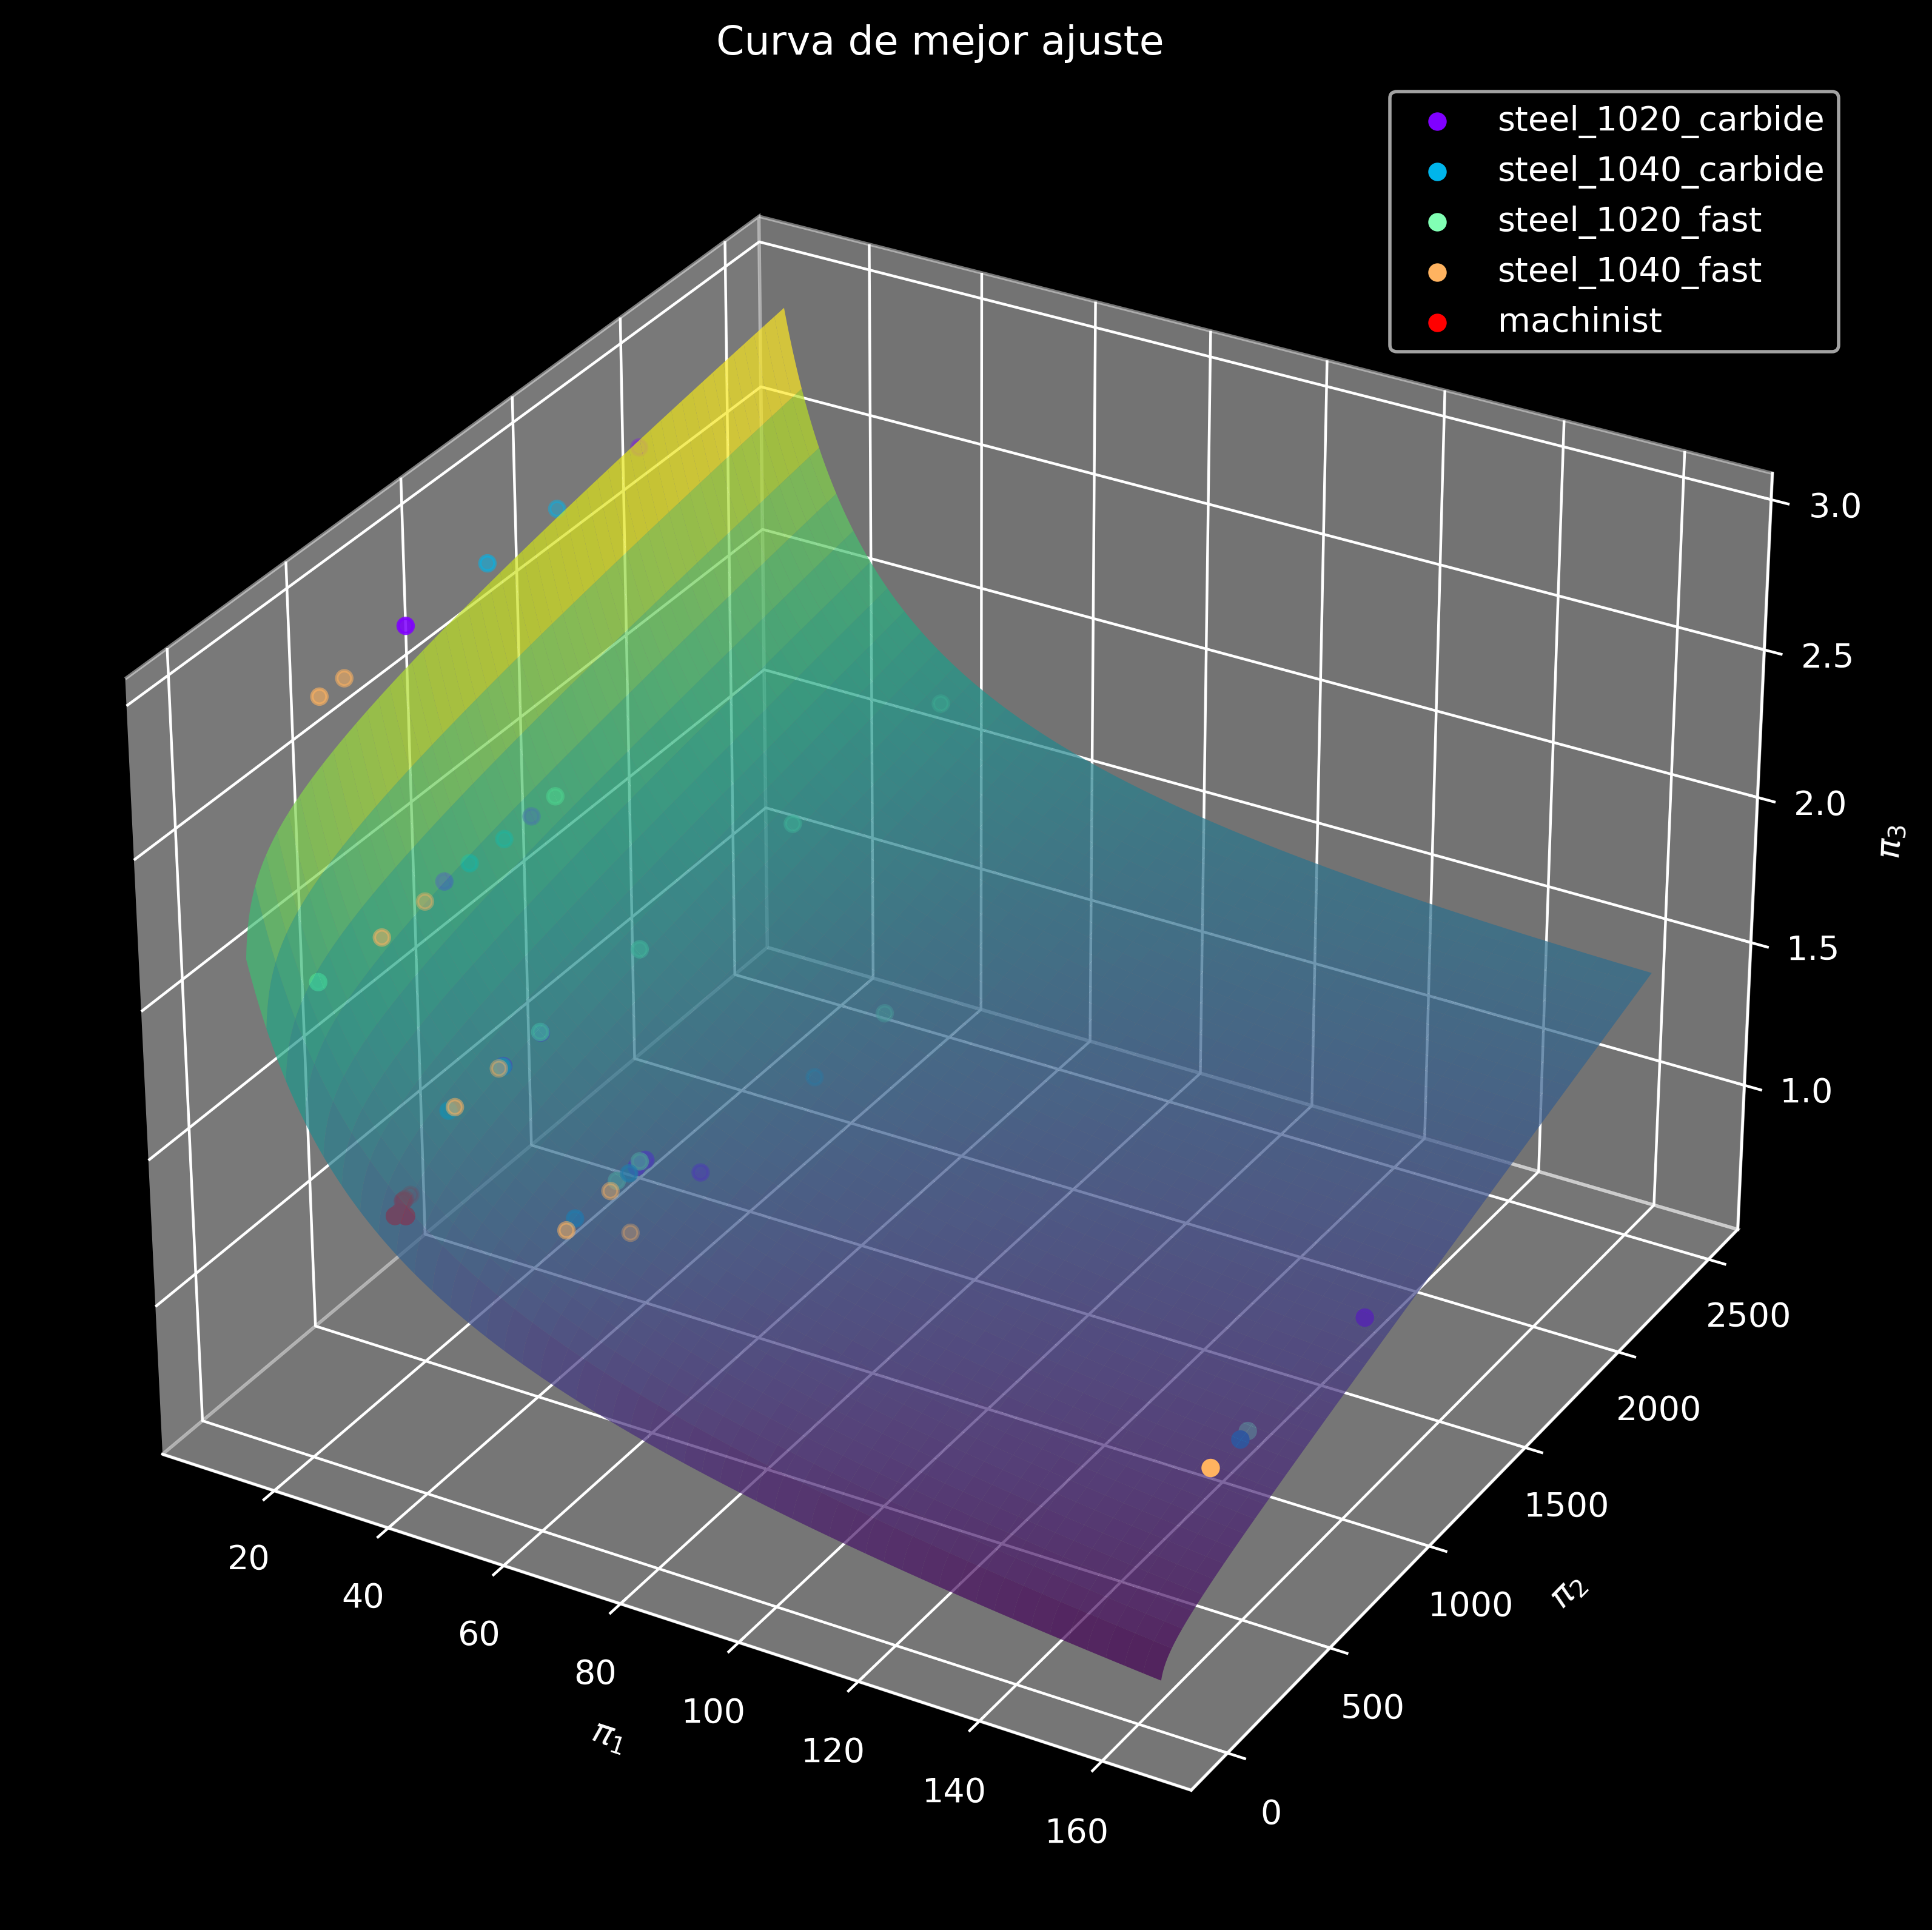

In [142]:
fig=plt.figure(figsize=(10,10),dpi=400)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(grid_x,grid_y,z,alpha=0.7,cmap='viridis')
color = iter(cm.rainbow(np.linspace(0, 1, len(lb))))
for i, c in zip(range(len(lb)), color):
    graph_data(df[i],lb[i,0],ax,c)
ax.set_xlabel(r'$\pi_1$')
ax.set_ylabel(r'$\pi_2$')
ax.set_zlabel(r'$\pi_3$')
ax.title.set_text(r'Curva de mejor ajuste')
ax.legend()
plt.show()


Grafica de contorno

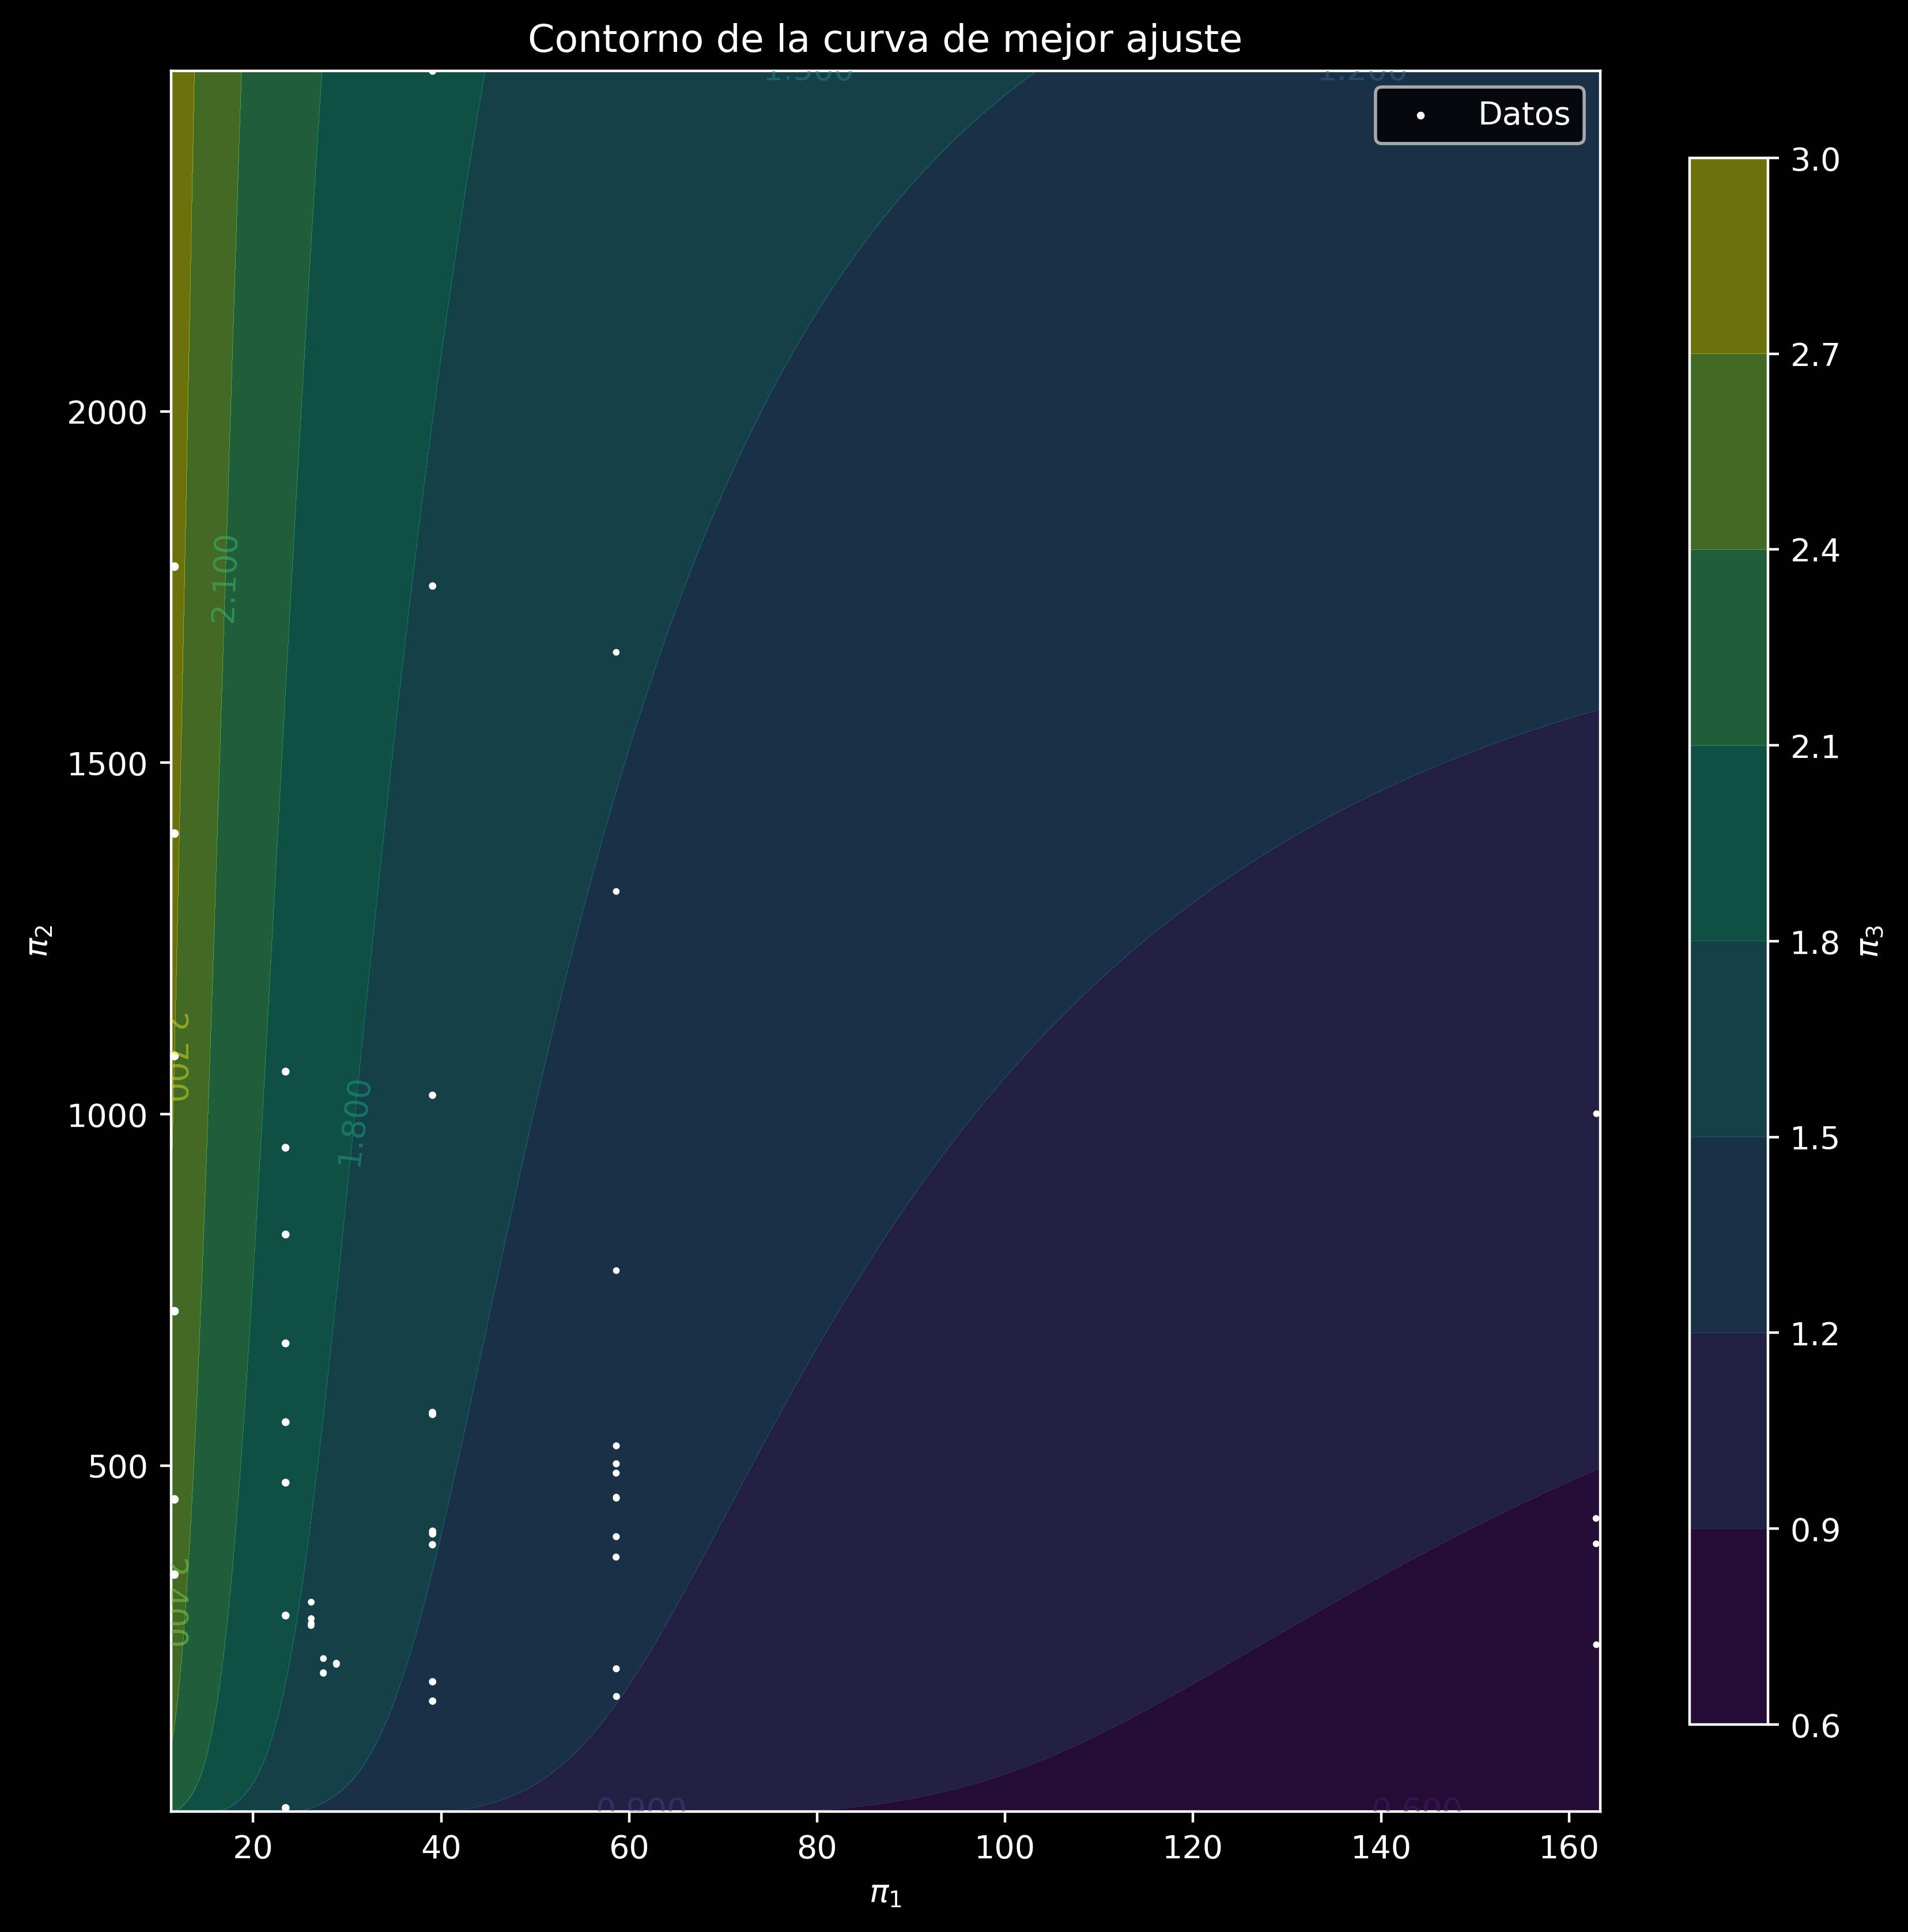

In [143]:
fig,ax=plt.subplots(figsize=(10,10),dpi=400)
cs=ax.contourf(grid_x,grid_y,z,alpha=0.5,cmap='viridis')
ax.clabel(cs,inline=1,fontsize=10)
cb=fig.colorbar(cs,ax=ax,shrink=0.9)
cb.set_label(r'$\pi_3$')
plt.scatter(pi_1,pi_2,pi_3,color='white',label='Datos')
plt.xlabel(r'$\pi_1$')
plt.ylabel(r'$\pi_2$')
plt.title(r'Contorno de la curva de mejor ajuste')
plt.legend()
plt.show()


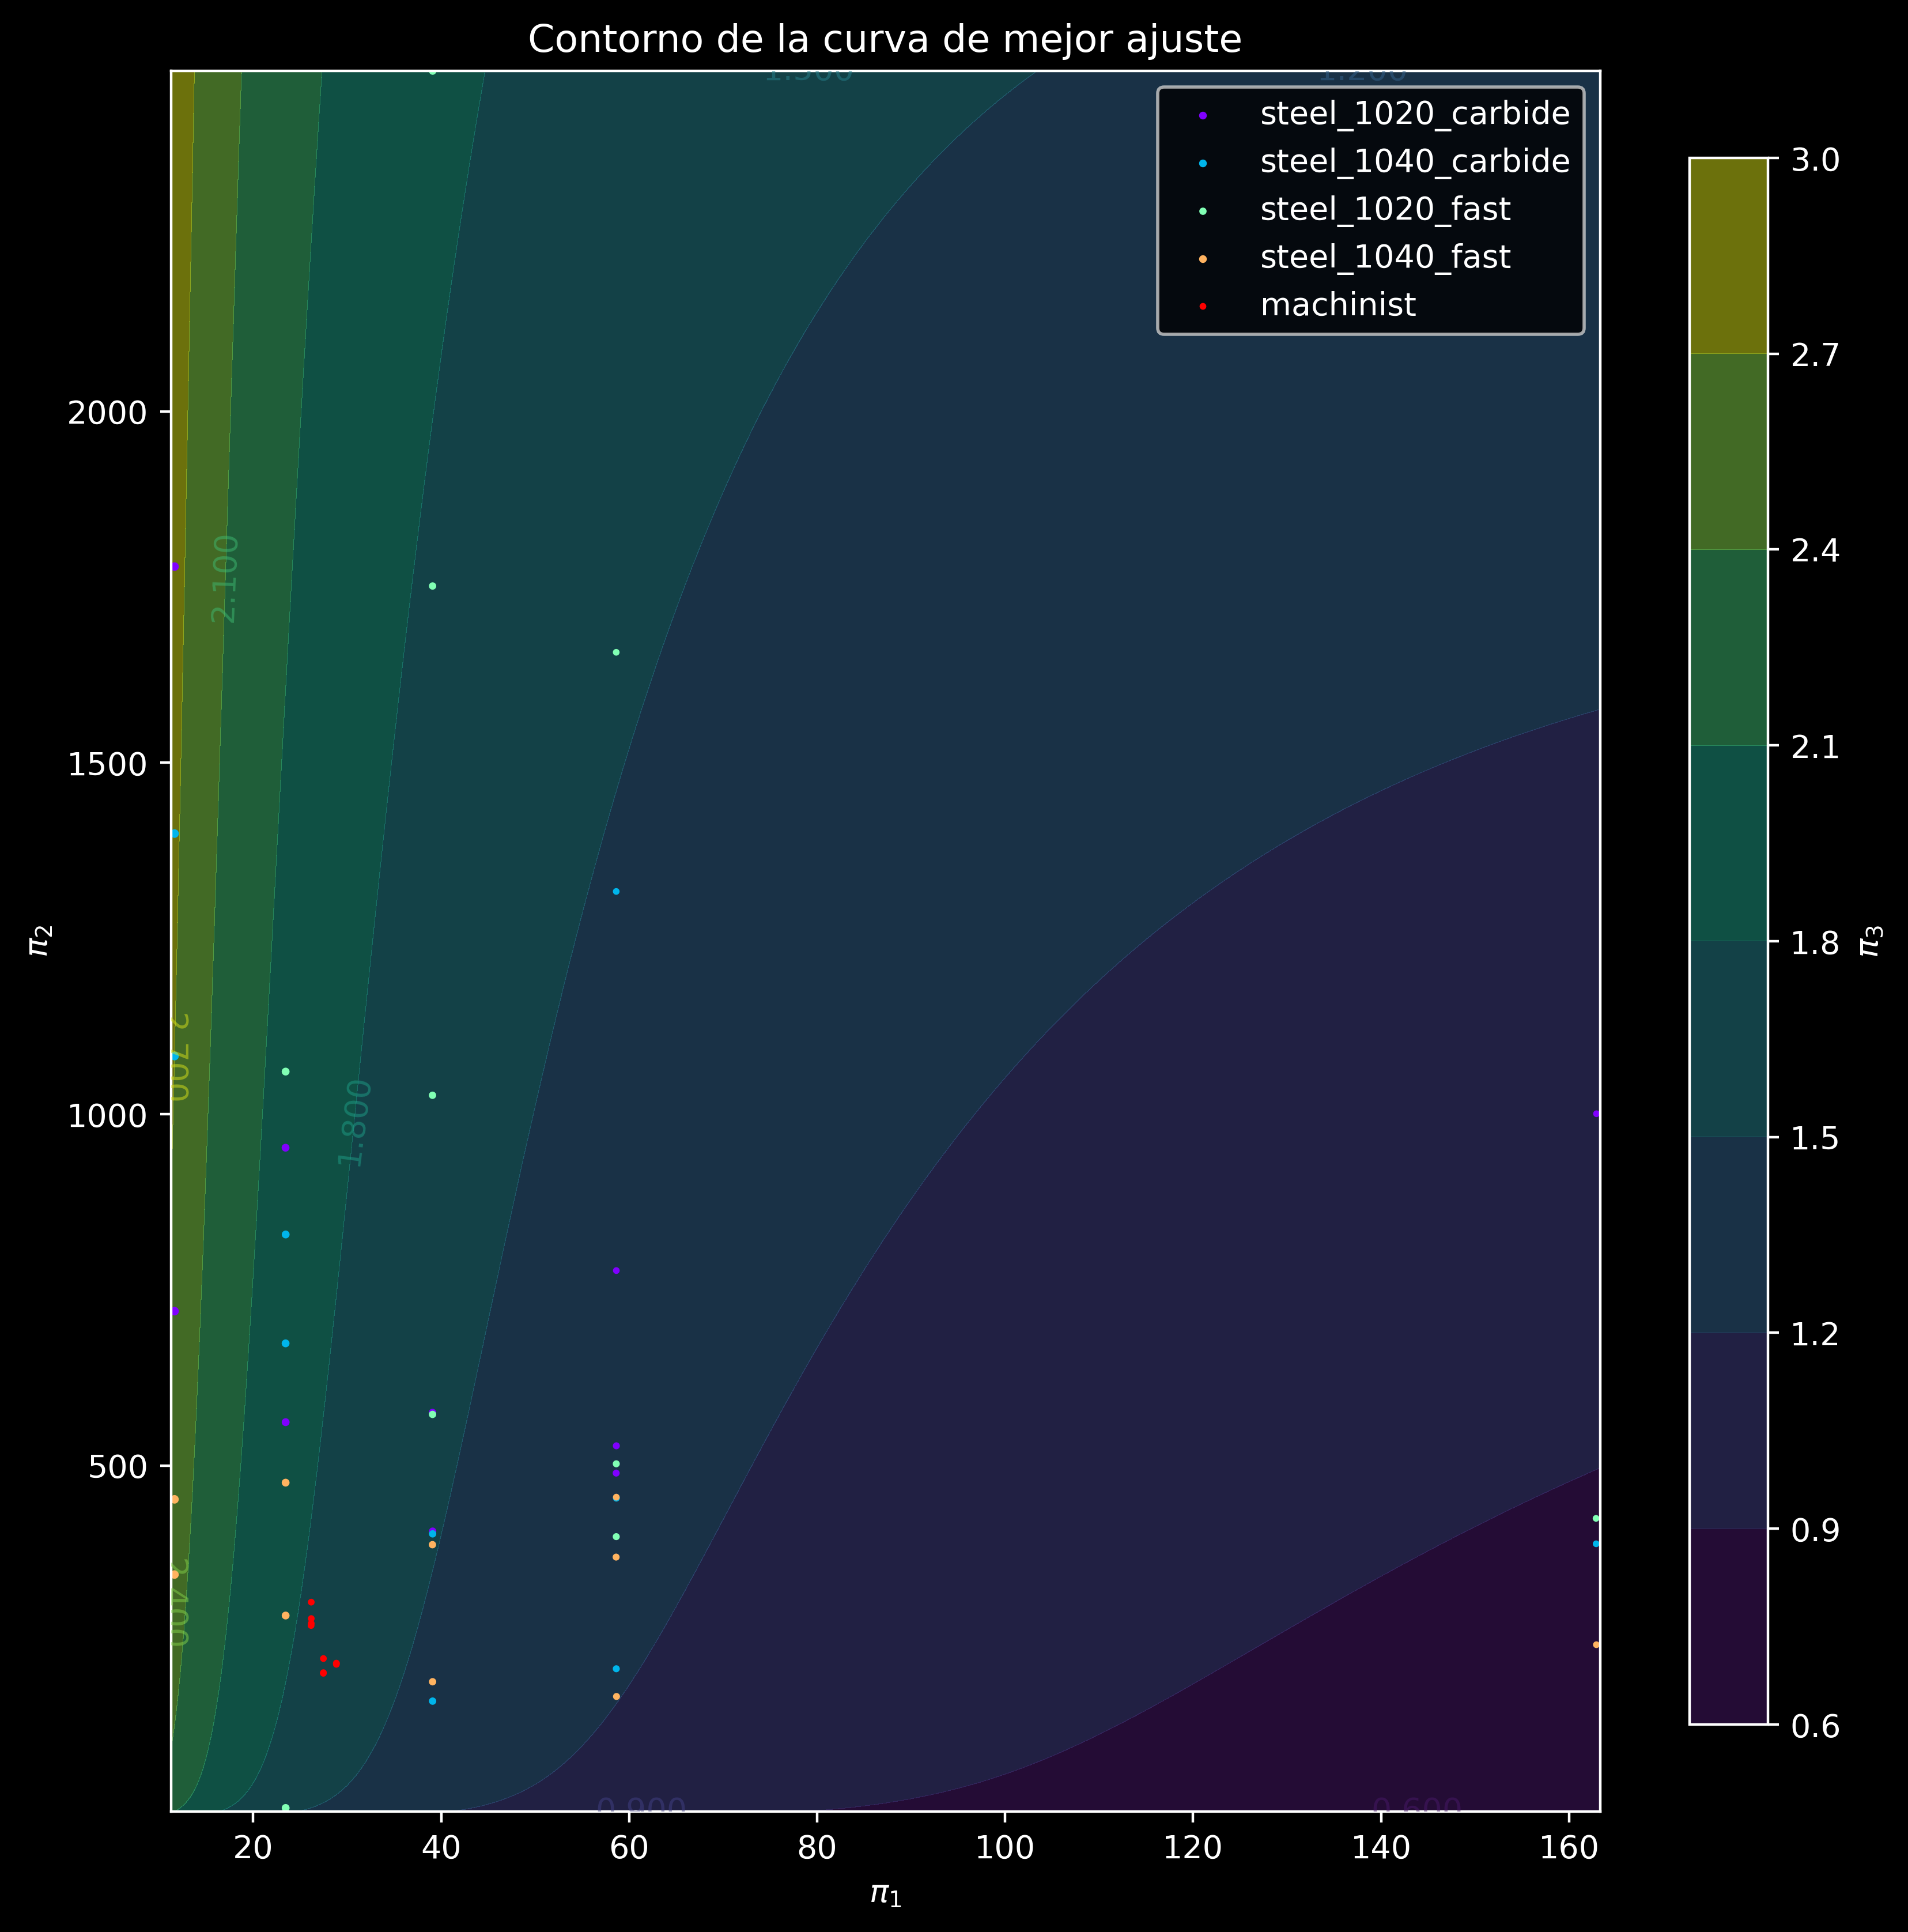

In [144]:
fig,ax=plt.subplots(figsize=(10,10),dpi=400)
cs=ax.contourf(grid_x,grid_y,z,alpha=0.5,cmap='viridis')
ax.clabel(cs,inline=1,fontsize=10)
cb=fig.colorbar(cs,ax=ax,shrink=0.9)
cb.set_label(r'$\pi_3$',color='white')
color = iter(cm.rainbow(np.linspace(0, 1, len(lb))))
for i, c in zip(range(len(lb)), color):
    graph_data(df[i],lb[i,0],ax,c)
plt.xlabel(r'$\pi_1$')
plt.ylabel(r'$\pi_2$')
plt.title(r'Contorno de la curva de mejor ajuste')
plt.legend()
plt.show()

# Optimización 

### Nomenclatura

Símbolo  | Descripción
-------- | ----------------------------------------
$T_p$    | Tiempo de preparación de la máquina (s).
$T_i$    | Tiempo de Improductividad (s).
$T_{cd}$ | Tiempo de carga y descarga de material (s).
$T_{t}$   | Tiempo de cambio de la herramienta (s).
$C_p$    | Costo de preparación de la máquina ($).
$C_i$    | Costo de improductividad ($).
$C_p$    | Costo de preparación de la máquina ($).
$C_f$    | Costo del fluido de corte ($).
$C_{om}$ | Costo de operacion de la máquina ($).
$V_b$    | Desgaste de operación  de la máquina ($\mu m$).
$A_v$    | Velocidad de avance del movimiento
$P_c$    | Profundidad de corte (mm)
$L_m$    | Longitud mecanizada de material (mm)
$T$      | Tiempo efectivo de mecanizado (min)
$V_{MR}$ | Volumen de material retirado (mm^3)
$T_{OHP}$| tiempo de operación de la herramienta (s)
$C_{MP}$ | Costo de materia prima ($).
$V_{MP}$ | Volumen de materia prima ($mm^3$)



$$\pi_1= \frac{\frac{C_p+C_i+C_f+C_{om}}{V_{MR}}}{\frac{C_{MP}}{V_{MP}}}$$

$$C_1=C_p+C_i+C_f+C_{om}$$
$$C_{HF}=\left(\frac{C_H\times T_{OHP}}{NF\times T_{TM}}\right)$$
$$\pi_2=\frac{\frac{C_1}{V_b}}{\frac{C_{HF}}{L_m}}$$

$$\pi_3=\frac{V_v}{V_p}$$

Selecione la rentabilidad minima que desea de la operación de maquinado
----Presione enter para que la rentablidad minima sea la media de los datos---
La rentabilidad minima es:1.4138453334341288


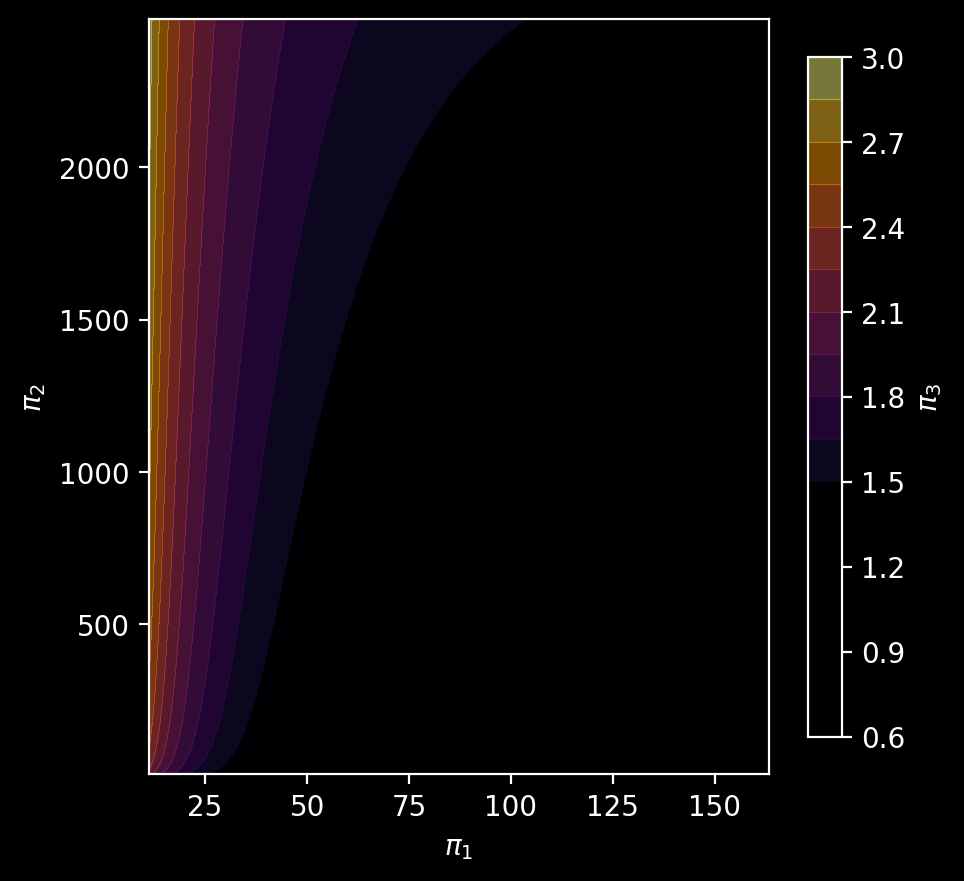

In [145]:
# Function to calculate the best operation point
print('Selecione la rentabilidad minima que desea de la operación de maquinado')
print('----Presione enter para que la rentablidad minima sea la media de los datos---')
def best_point(min_rent=z.mean()):
    fig,ax=plt.subplots(figsize=(5,5),dpi=200)
    cs=ax.contourf(grid_x,grid_y,z,alpha=0.5,levels=20,vmin=min_rent,cmap='inferno')
    cb=fig.colorbar(cs,ax=ax,shrink=0.9)
    cb.set_label(r'$\pi_3$',color='white')
    ax.set_xlabel(r'$\pi_1$')
    ax.set_ylabel(r'$\pi_2$')



min_rent=input('Rentabilidad minima:')
if min_rent=='':
    min_rent=z.mean()
else:
    min_rent=float(min_rent)
print('La rentabilidad minima es:'+str(min_rent))
best_point(min_rent)


In [162]:
print('Ingrese los numeros adimensionales selecionados')
print('Seleciona el indicador pi_1')
pi_1_opt=float(input('pi_1:'))
print('pi_1:'+"{:.2f}".format(pi_1_opt))
print('Seleciona el indicador pi_2')
pi_2_opt=float(input('pi_2:'))
print('pi_2:'+"{:.2f}".format(pi_2_opt))
print('Seleciona el indicador pi_3')
pi_3_opt=float(input('pi_3:'))
print('pi_3:'+"{:.2f}".format(pi_3_opt))

Ingrese los numeros adimensionales selecionados
Seleciona el indicador pi_1
pi_1:12.50
Seleciona el indicador pi_2
pi_2:250.00
Seleciona el indicador pi_3
pi_3:2.40


In [169]:
# Calculate the optimal cost

#Parameters
P_c=7#[mm] Profundidad del corte
L_m=60#[mm] Longitud mecanizada
A_v=0.2094#[mm/s] Avance
C_MP=7000#[$] Costo de materia prima
N_f=2#Numero de filos
V_MP=506707.4791#[mm^3] Volumen de materia prima
V_B=410.03#[\mu m] desgaste de la herramienta de corte
def optimal_cost(pi_1_e,pi_2_e,pi_3_e):
    pi_1_eq = lambda T_POH:-pi_1_e+(C1/(P_c*L_m*A_v*T_POH))/(C_MP/V_MP)
    T_POH=fsolve(pi_1_eq,100)
    pi_2_eq = lambda T_h:-pi_2_e+(C1/(V_B*10**-3))/(((C_H*T_POH)/(N_f*(T_POH+T_h)))/L_m)
    T_h=fsolve(pi_2_eq,1)
    C_HF=(C_H*T_POH)/(N_f*(T_POH+T_h))
    return T_POH,T_h,C_HF
T_POH, T_h, C_HF=optimal_cost(pi_1_opt,pi_2_opt,pi_3_opt)
print('El tiempo de operación optimo es: '+"{:.2f}".format(float(T_POH))+'[s]')
print('El tiempo optimo de carga es: '+"{:.2f}".format(float(T_h))+'[s]')
print('El volumen removido optimo es: ',np.round(P_c*L_m*A_v*float(T_POH),3),'[mm^3]')
print('El costo de herramienta por filo optimo es: ',np.round(float(C_HF),3),'[$]')

El tiempo de operación optimo es: 266.67[s]
El tiempo optimo de carga es: 59.56[s]
El volumen removido optimo es:  23453.318 [mm^3]
El costo de herramienta por filo optimo es:  2370.558 [$]
